# **Jax**

In [1]:
# make sure jax is using the gpu
from jax.lib import xla_bridge
print(f"JAX device: {xla_bridge.get_backend().platform}")

#rest of the imports
import jax
import timeit
import jax.numpy as jnp
from sine_gaussian_jax import SineGaussianJax

JAX device: gpu


In [2]:
sample_rate = 4096.0
duration = 10.0

sg_jax = SineGaussianJax(sample_rate, duration)

quality = jnp.linspace(3, 100, 1000)
frequency = jnp.logspace(1, 3, 1000)
hrss = jnp.logspace(-23, -6, 1000)
phase = jnp.linspace(0, 2 * jnp.pi, 1000)
eccentricity = jnp.linspace(0, 0.99, 1000)

sg_jit = jax.jit(sg_jax)

#benchmark speed
print("Regular Jax")
print(timeit.timeit(lambda: sg_jax(quality, frequency, hrss, phase, eccentricity), number=10000))
print("Jax with JIT")
print(timeit.timeit(lambda: sg_jit(quality, frequency, hrss, phase, eccentricity), number=10000))


2024-06-02 18:54:08.144989: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Regular Jax
109.79722192999998
Jax with JIT
15.26603592399988


# **Torch**

In [1]:
# make sure torch is using the gpu
import torch
print(f"Torch GPU Available: {torch.cuda.is_available()}, {torch.cuda.get_device_name(0)}")

#rest of the imports
import timeit
import numpy as np
from sine_gaussian import SineGaussian

Torch GPU Available: True, GRID A100X-20C


In [2]:
sample_rate = 4096.0
duration = 10.0

sg_torch = SineGaussian(sample_rate, duration)

quality = torch.linspace(3, 100, 1000).cuda()
frequency = torch.logspace(1, 3, 1000).cuda()
hrss = torch.logspace(-23, -6, 1000).cuda()
phase = torch.linspace(0, 2 * np.pi, 1000).cuda()
eccentricity = torch.linspace(0, 0.99, 1000).cuda()

sg_torch = sg_torch.cuda()

#benchmark speed
print(timeit.timeit(lambda: sg_torch(quality, frequency, hrss, phase, eccentricity), number=10000))

71.20611253599964


# **Comparision**

In [1]:
import matplotlib.pyplot as plt

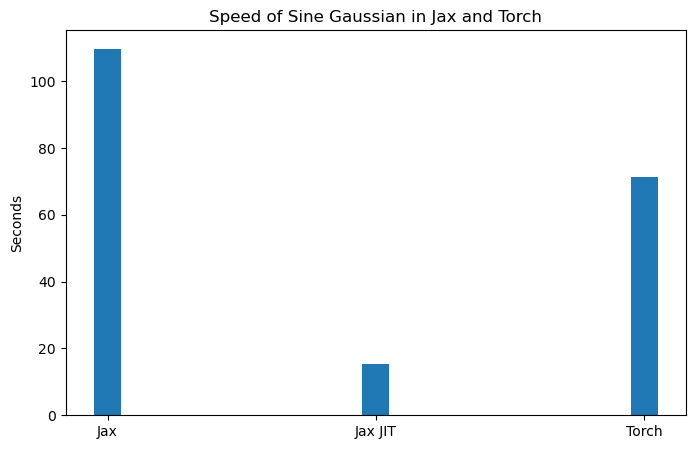

In [2]:
results = [109.79722192999998, 15.26603592399988, 71.20611253599964]

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.bar(["Jax", "Jax JIT", "Torch"], results, width=0.1)
ax.set_ylabel("Seconds")
ax.set_title("Speed of Sine Gaussian in Jax and Torch")
plt.show()